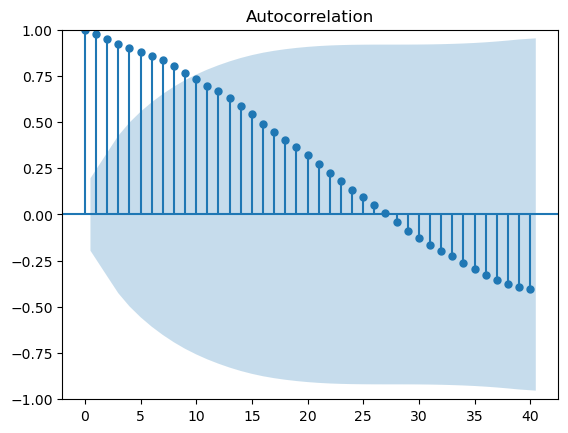

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample data generation
np.random.seed(0)
data = np.random.randn(100).cumsum()

# ACF plot
sm.graphics.tsa.plot_acf(data, lags=40)
plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.132038
p-value: 0.702128
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


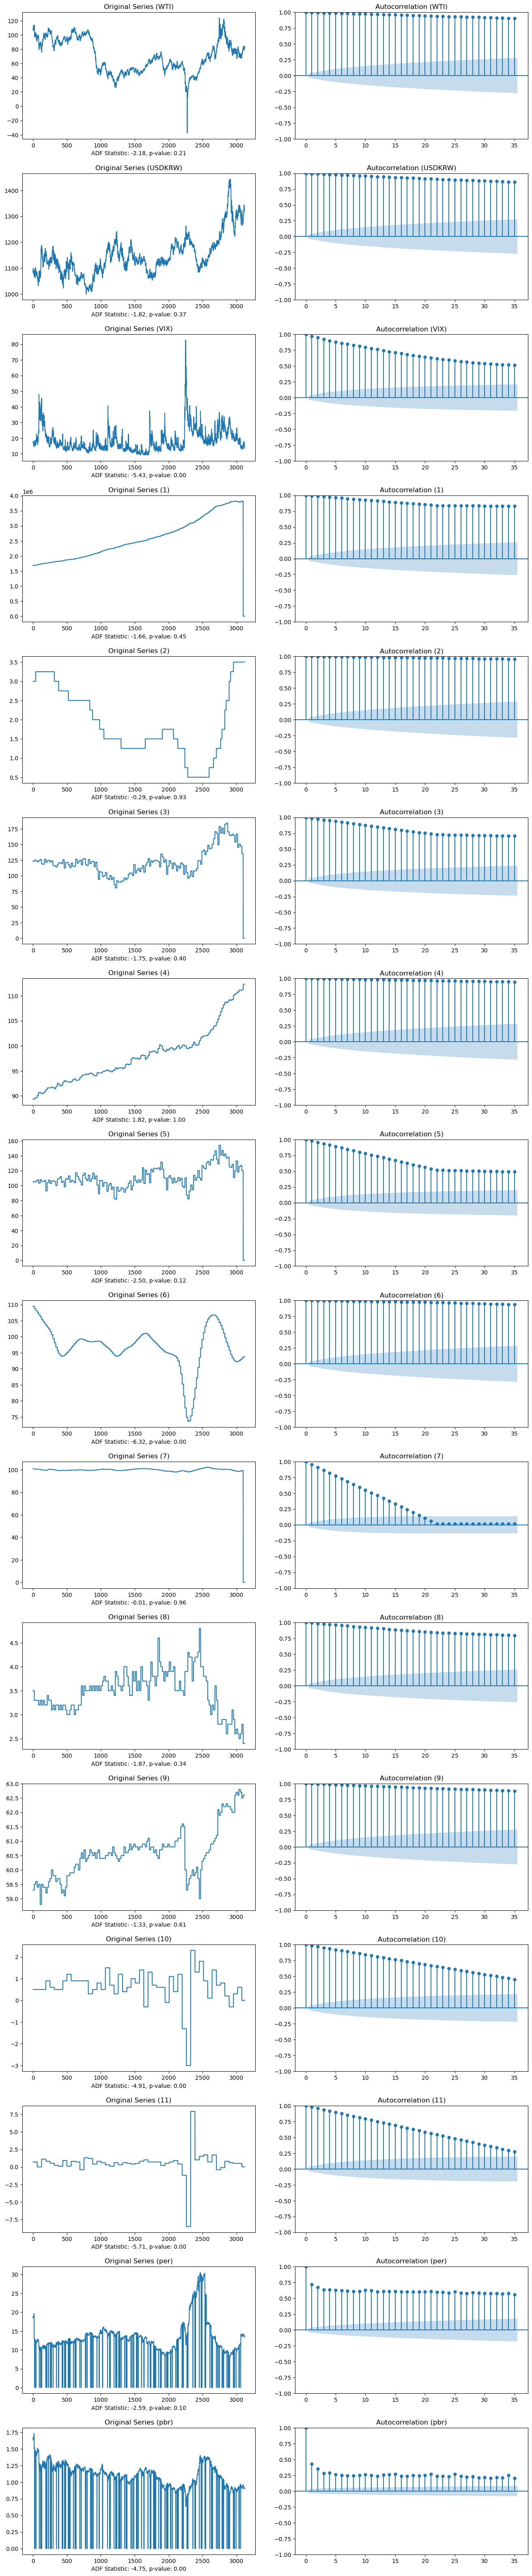

['WTI', 'USDKRW', '1', '2', '3', '4', '5', '7', '8', '9', 'per']

In [7]:
# p-value 및 자기상관성 검사

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

# Load data
data = pd.read_csv('datasets.csv')

# Exclude non-numeric columns
numeric_columns = data.columns[2:]

# Create subplots
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(14, len(numeric_columns)*4))
fig.tight_layout(pad=4.0)

# For storing columns that are not stationary
non_stationary_cols = []

# Iterate over each numeric column
for idx, column in enumerate(numeric_columns):
    # Plotting original series
    axes[idx, 0].plot(data[column])
    axes[idx, 0].set_title(f'Original Series ({column})')
    
    # ADF Test
    result = adfuller(data[column])
    axes[idx, 0].set_xlabel(f'ADF Statistic: {result[0]:.2f}, p-value: {result[1]:.2f}')
    if result[1] > 0.05:
        non_stationary_cols.append(column)
    
    # ACF plot
    plot_acf(data[column], ax=axes[idx, 1], title=f'Autocorrelation ({column})')

# Show plots
plt.show()

# Return non-stationary columns for further processing
non_stationary_cols


In [17]:
# 데이터 로드
data = pd.read_csv('real.csv', encoding='cp949')

# 5의 배수 인덱스만 선택하여 데이터를 줄입니다.
reduced_data = data.iloc[::5].copy()

# 결과를 CSV 파일로 저장합니다.
reduced_data.to_csv('reduced_data.csv', index=False, encoding='cp949')

# 결과 확인
(reduced_data.head(), reduced_data.shape)

(          Date forward_stage   WTI  USDKRW   VIX    1    2    3    4    5  \
 0   2011-04-01          down  0.53   -14.0  0.10  0.0  0.0  0.0  0.0  0.0   
 5   2011-04-08       neutral -2.87    -8.1 -1.28  0.0  0.0  0.0  0.0  0.0   
 10  2011-04-15          down -2.54     1.0  1.64  0.0  0.0  0.0  0.0  0.0   
 15  2011-04-25          down -0.07    -1.5 -0.15  0.0  0.0  0.0  0.0  0.0   
 20  2011-05-02          down -2.47    -1.6  0.71  0.0  0.0  0.0  0.0  0.0   
 
       6    7    8    9   10   11   per   pbr  
 0   0.0  0.0  0.0  0.0  0.0  0.0 -0.05 -0.01  
 5   0.0  0.0  0.0  0.0  0.0  0.0 -0.04  0.00  
 10  0.0  0.0  0.0  0.0  0.0  0.0 -0.02  0.00  
 15  0.0  0.0  0.0  0.0  0.0  0.0 -0.09  0.00  
 20  0.0  0.0  0.0  0.0  0.0  0.0 -0.17 -0.02  ,
 (625, 18))

In [19]:
import pandas as pd

# Load the merged data
merged_data = pd.read_csv('updown.csv')

# Replace '상승' with 'up' and '하락' with 'down' in the 'forward_stage' column
merged_data['forward_stage'] = merged_data['forward_stage'].replace({'상승': 'up', '하락': 'down'})

# Save the updated dataframe to a new CSV file
updated_file_path = 'updated_updown.csv'
merged_data.to_csv(updated_file_path, index=False)

# Return the path to the updated file and a sample of the updated data
updated_file_path, merged_data.head()


('updated_updown.csv',
        Date forward_stage    WTI  USDKRW    VIX
 0  07-01-02            up  61.05  914.42  12.04
 1  07-01-03            up  58.32  914.31  12.04
 2  07-01-04            up  55.59  925.24  11.51
 3  07-01-05            up  56.31  925.44  12.14
 4  07-01-08            up  56.09  924.37  12.00)

In [20]:
import pandas as pd

# Load the data
merged_data_path = 'merged_data.csv'
merged_data = pd.read_csv(merged_data_path)

# Replace 'forward_stage' values
merged_data['forward_stage'] = merged_data['forward_stage'].replace({'하락': 'down', '상승': 'up'})

# Save the updated data
updated_data_path = 'updated_merged_data.csv'
merged_data.to_csv(updated_data_path, index=False)

# Provide a sample of the updated data
merged_data.head(), updated_data_path


(         Date forward_stage   WTI  USDKRW   VIX    1    2    3    4    5    6  \
 0  2011-04-13          down  1.00    -1.7 -0.65  0.0  0.0  0.0  0.0  0.0  0.0   
 1  2011-04-14            up  1.55     0.0 -0.95  0.0  0.0  0.0  0.0  0.0  0.0   
 2  2011-04-18          down  1.03     0.8 -1.13  0.0  0.0  0.0  0.0  0.0  0.0   
 3  2011-04-19          down  3.30    -5.8 -0.76  0.0  0.0  0.0  0.0  0.0  0.0   
 4  2011-05-16            up -0.46     4.6 -0.69  0.0  0.0  0.0  0.0  0.0  0.0   
 
      7    8    9   10   11   per   pbr  
 0  0.0  0.0  0.0  0.0  0.0  0.17  0.01  
 1  0.0  0.0  0.0  0.0  0.0 -0.02  0.00  
 2  0.0  0.0  0.0  0.0  0.0 -0.13 -0.01  
 3  0.0  0.0  0.0  0.0  0.0  0.44  0.04  
 4  0.0  0.0  0.0  0.0  0.0 -0.01  0.00  ,
 'updated_merged_data.csv')

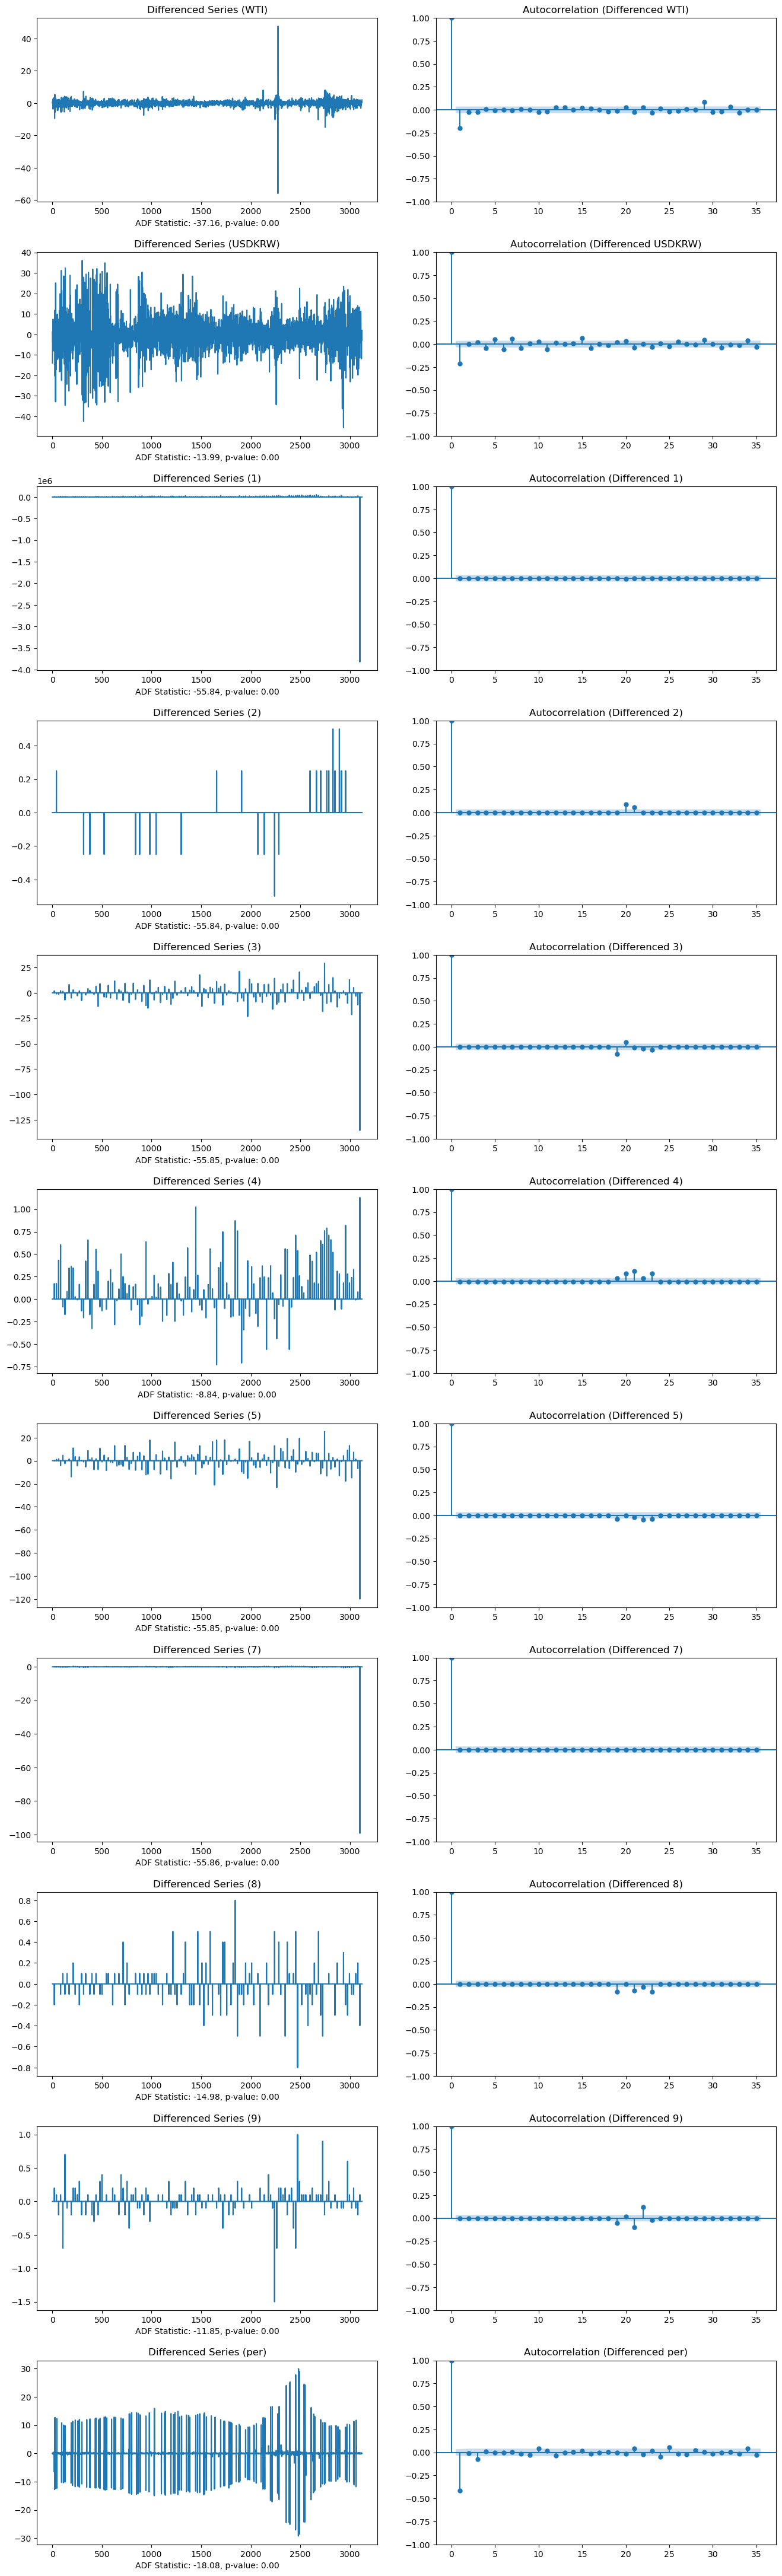

[]

In [8]:
# Create subplots for differenced data
fig, axes = plt.subplots(len(non_stationary_cols), 2, figsize=(14, len(non_stationary_cols)*4))
fig.tight_layout(pad=4.0)

# For storing columns that are still not stationary after first differencing
still_non_stationary = []

# Iterate over non-stationary columns
for idx, column in enumerate(non_stationary_cols):
    # Perform differencing
    diff_data = data[column].diff().dropna()
    
    # Plotting differenced series
    axes[idx, 0].plot(diff_data)
    axes[idx, 0].set_title(f'Differenced Series ({column})')
    
    # ADF Test on differenced data
    result_diff = adfuller(diff_data)
    axes[idx, 0].set_xlabel(f'ADF Statistic: {result_diff[0]:.2f}, p-value: {result_diff[1]:.2f}')
    if result_diff[1] > 0.05:
        still_non_stationary.append(column)
    
    # ACF plot on differenced data
    plot_acf(diff_data, ax=axes[idx, 1], title=f'Autocorrelation (Differenced {column})')

# Show plots
plt.show()

# Return columns that are still non-stationary after differencing
still_non_stationary


In [9]:
import pandas as pd

# Load the dataset again since the kernel was restarted
df = pd.read_csv('datasets.csv')

# Drop non-numeric columns
numeric_data = df.drop(columns=['Date', 'forward_stage'])

# Apply differencing
diff_data = numeric_data.diff().dropna()

# Save the processed data to a CSV file
diff_data.to_csv('processed_data.csv', index=False)

# Getting basic information and statistical description of the processed data
info = diff_data.info()
describe = diff_data.describe()

# Show head of the processed data
diff_data.head(), info, describe


<class 'pandas.core.frame.DataFrame'>
Index: 3121 entries, 1 to 3121
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTI     3121 non-null   float64
 1   USDKRW  3121 non-null   float64
 2   VIX     3121 non-null   float64
 3   1       3121 non-null   float64
 4   2       3121 non-null   float64
 5   3       3121 non-null   float64
 6   4       3121 non-null   float64
 7   5       3121 non-null   float64
 8   6       3121 non-null   float64
 9   7       3121 non-null   float64
 10  8       3121 non-null   float64
 11  9       3121 non-null   float64
 12  10      3121 non-null   float64
 13  11      3121 non-null   float64
 14  per     3121 non-null   float64
 15  pbr     3121 non-null   float64
dtypes: float64(16)
memory usage: 414.5 KB


(    WTI  USDKRW   VIX    1    2    3    4    5    6    7    8    9   10   11  \
 1  0.53   -14.0  0.10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2 -0.13     1.3 -0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 3  0.49     0.7 -0.35  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 4  1.47    -3.9  0.21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 5  2.49     4.4  0.76  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 
     per   pbr  
 1 -0.05 -0.01  
 2  0.14  0.01  
 3 -0.04  0.00  
 4 -0.04  0.00  
 5  0.05  0.00  ,
 None,
                WTI       USDKRW          VIX             1            2  \
 count  3121.000000  3121.000000  3121.000000  3.121000e+03  3121.000000   
 mean     -0.007789     0.071717    -0.001227 -5.402468e+02     0.000160   
 std       2.051920     7.943210     1.854803  6.851043e+04     0.026097   
 min     -55.900000   -45.570000   -17.640000 -3.820634e+06    -0.500000   
 25%      -0.800000   

In [14]:
import pandas as pd

# Load the original data
original_data = pd.read_csv('datasets.csv')
date_column = original_data['Date']

# Load the processed data
processed_data = pd.read_csv('processed_data.csv')

# Add the 'Date' column to the processed data
processed_data['Date'] = date_column

# Save the processed data with the 'Date' column
processed_data.to_csv('processed_data_with_date.csv', index=False)

# Display the first few rows of the processed data
processed_data.head()


,WTI,USDKRW,VIX,1,2,3,4,5,6,7,8,9,10,11,per,pbr,Date
0,0.53,-14.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.05,-0.01,2011-04-01
1,-0.13,1.3,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.01,2011-04-04
2,0.49,0.7,-0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04,0.00,2011-04-05
3,1.47,-3.9,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04,0.00,2011-04-06
4,2.49,4.4,0.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.00,2011-04-07


In [15]:
# 데이터 불러오기
processed_data_with_date = pd.read_csv('processed_data_with_date.csv')

# 'Date' 칼럼을 인덱스로 설정
processed_data_with_date.set_index('Date', inplace=True)

# 데이터를 CSV 파일로 저장
processed_data_with_date.to_csv('processed_data_final.csv')

# 데이터 확인
processed_data_with_date.head()


,WTI,USDKRW,VIX,1,2,3,4,5,6,7,8,9,10,11,per,pbr
Date,,,,,,,,,,,,,,,,
2011-04-01,0.53,-14.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.05,-0.01
2011-04-04,-0.13,1.3,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.01
2011-04-05,0.49,0.7,-0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04,0.00
2011-04-06,1.47,-3.9,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04,0.00
2011-04-07,2.49,4.4,0.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.00


In [16]:
import pandas as pd

# Load the original datasets and processed data
datasets = pd.read_csv('datasets.csv')
processed_data = pd.read_csv('1.csv')

# Insert 'forward_stage' column to the processed_data
processed_data.insert(1, 'forward_stage', datasets['forward_stage'])

# Save the processed data
processed_data.to_csv('processed_data_with_stage.csv', index=False)

# Show the modified processed data
processed_data.head()


,Date,forward_stage,WTI,USDKRW,VIX,1,2,3,4,5,6,7,8,9,10,11,per,pbr
0,2011-04-01,down,0.53,-14.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.05,-0.01
1,2011-04-04,down,-0.13,1.3,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.01
2,2011-04-05,down,0.49,0.7,-0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04,0.00
3,2011-04-06,down,1.47,-3.9,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04,0.00
4,2011-04-07,neutral,2.49,4.4,0.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.00
